# KNN classification avec sklearn

## Importation des packages

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

## Génération du jeu de données

In [ ]:
x_train , y_train = make_moons(100, noise=0.05, random_state=1)
x_test , y_test = make_moons(50, noise=0.15, random_state=1)

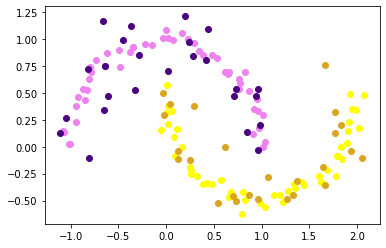

In [ ]:
plt.scatter(x_train[y_train==0][:, 0], x_train[y_train==0][:, 1], c='violet')
plt.scatter(x_train[y_train==1][:, 0], x_train[y_train==1][:, 1], c='yellow')

plt.scatter(x_test[y_test==0][:, 0], x_test[y_test==0][:, 1], c='indigo')
plt.scatter(x_test[y_test==1][:, 0], x_test[y_test==1][:, 1], c='goldenrod')
plt.show()

## Normalisation des données

In [ ]:
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

## Entrainer un KNN avec sklearn

### Initialisation du modèle


In [ ]:
knn = KNeighborsClassifier()

### Entraînement du modèle

In [ ]:
knn.fit(x_train_norm, y_train)

KNeighborsClassifier()

### Prédiction sur de nouvelles données

In [ ]:
prediction = knn.predict(x_test_norm)

## Paramètre

### n_neighbors

*n_neighbors* est le paramètre qui gère le nombre de voisin que l'on va utiliser pour effectuer la prédiction.

En général, on ne prend que des nombres impairs pour éviter qu'il y ait des égalités dans la classification.

Plus le paramètre sera petit plus le modèle va tendre vers l'overfitting.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train_norm, y_train)

prediction = knn.predict(x_test_norm)

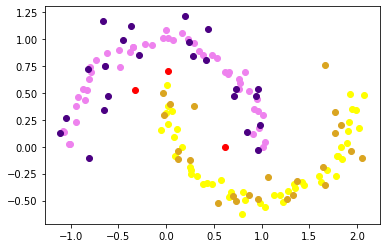

In [ ]:
plt.scatter(x_train[y_train==0][:, 0], x_train[y_train==0][:, 1], c='violet')
plt.scatter(x_train[y_train==1][:, 0], x_train[y_train==1][:, 1], c='yellow')

plt.scatter(x_test[np.logical_and(prediction==0, y_test==0)][:, 0],
            x_test[np.logical_and(prediction==0, y_test==0)][:, 1], c='indigo')
plt.scatter(x_test[np.logical_and(prediction==1, y_test==1)][:, 0],
            x_test[np.logical_and(prediction==1, y_test==1)][:, 1], c='goldenrod')
plt.scatter(x_test[prediction!=y_test][:, 0],
            x_test[prediction!=y_test][:, 1], c='red')
plt.show()

Plus ce paramètre sera grand plus notre modèle va tendre vers un underfitting

In [ ]:
knn = KNeighborsClassifier(n_neighbors=91)

knn.fit(x_train_norm, y_train)

prediction = knn.predict(x_test_norm)

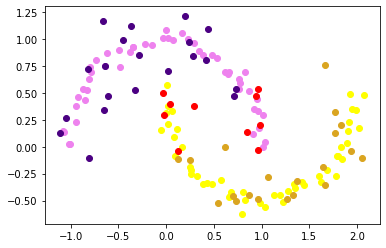

In [ ]:
plt.scatter(x_train[y_train==0][:, 0], x_train[y_train==0][:, 1], c='violet')
plt.scatter(x_train[y_train==1][:, 0], x_train[y_train==1][:, 1], c='yellow')

plt.scatter(x_test[np.logical_and(prediction==0, y_test==0)][:, 0],
            x_test[np.logical_and(prediction==0, y_test==0)][:, 1], c='indigo')
plt.scatter(x_test[np.logical_and(prediction==1, y_test==1)][:, 0],
            x_test[np.logical_and(prediction==1, y_test==1)][:, 1], c='goldenrod')
plt.scatter(x_test[prediction!=y_test][:, 0],
            x_test[prediction!=y_test][:, 1], c='red')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train_norm, y_train)

prediction = knn.predict(x_test_norm)

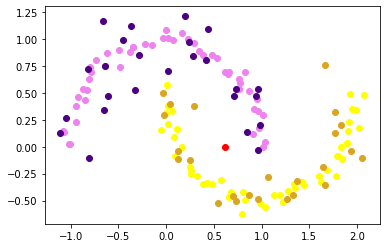

In [ ]:
plt.scatter(x_train[y_train==0][:, 0], x_train[y_train==0][:, 1], c='violet')
plt.scatter(x_train[y_train==1][:, 0], x_train[y_train==1][:, 1], c='yellow')

plt.scatter(x_test[np.logical_and(prediction==0, y_test==0)][:, 0],
            x_test[np.logical_and(prediction==0, y_test==0)][:, 1], c='indigo')
plt.scatter(x_test[np.logical_and(prediction==1, y_test==1)][:, 0],
            x_test[np.logical_and(prediction==1, y_test==1)][:, 1], c='goldenrod')
plt.scatter(x_test[prediction!=y_test][:, 0],
            x_test[prediction!=y_test][:, 1], c='red')
plt.show()

### weights

*weight* permet de donner plus de poids à certaines observations.

Vous pouvez choisir vous même le poids en fonction des caractéristiques de vos observations.

Vous pouvez également choisir un poids par rapport à la distance entre l'observation à prédire et ses voisins.

Par défaut on utilise uniform, qui donne le même poids à chaque exemple ce qui revient à ne pas utiliser de poids du tout.

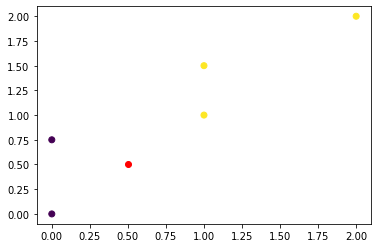

In [ ]:
x_ex = np.array([[0, 0], [1, 1], [0, 0.75], [1, 1.5], [2, 2]])
y_ex = np.array([0, 1, 0, 1, 1])
x_pred = np.array([0.5, 0.5]).reshape((1, 2))

plt.scatter(x_ex[:, 0], x_ex[:, 1], c=y_ex)
plt.scatter(x_pred[0, 0], x_pred[0, 1], c='red')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_ex, y_ex)

prediction = knn.predict(x_pred)
prediction_proba = knn.predict_proba(x_pred)

print(prediction)
print(prediction_proba)

[1]
[[0.4 0.6]]


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

knn.fit(x_ex, y_ex)

prediction = knn.predict(x_pred)
prediction_proba = knn.predict_proba(x_pred)

print(prediction)
print(prediction_proba)

[0]
[[0.53535138 0.46464862]]


### algorithm

Le paramètre *algorithm* permet de choisir la stratégie de calcul des plus proches voisins.

Sklearn nous propose plusieurs options.

Soit on utilise la valeur *brute* qui permet de calculer la distance entre chacune des observations de notre jeux de données.
Cette option bien que viable est très gourmande en temps de calcul et induit un problème de scalabilité dans le modèle.

Pour minimiser ce problème il existe des alternatives comme *ball_tree* et *kd_tree* qui permet de réduire le nombre d'observations avant le calcul des distances.

Le résultat final est sensiblement le même, ce parmaètre influe seulement sur le temps de calcul.

Je vous conseille de laisser la valeur par défaut *auto* qui permet de choisir la meilleure valeur en fonction du jeu de données d'entraînement.

In [ ]:
x_train , y_train = make_moons(100000, noise=0.05, random_state=1)
x_test , y_test = make_moons(10000, noise=0.15, random_state=1)

scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

In [ ]:
%%time
knn = KNeighborsClassifier(n_neighbors=9, algorithm='brute')

knn.fit(x_train_norm, y_train)

prediction = knn.predict(x_test_norm)

CPU times: user 22.6 s, sys: 2.2 s, total: 24.8 s
Wall time: 21.8 s


In [ ]:
%%time
knn = KNeighborsClassifier(n_neighbors=9, algorithm='ball_tree')

knn.fit(x_train_norm, y_train)

prediction = knn.predict(x_test_norm)

CPU times: user 554 ms, sys: 24.7 ms, total: 579 ms
Wall time: 578 ms


In [ ]:
%%time
knn = KNeighborsClassifier(n_neighbors=9, algorithm='kd_tree')

knn.fit(x_train_norm, y_train)

prediction = knn.predict(x_test_norm)

CPU times: user 390 ms, sys: 20.6 ms, total: 410 ms
Wall time: 412 ms


### leaf_size

Le paramètre leaf_size est seulement utilisé lorsque vous utilisez comme algorithme *ball_tree* et *kd_tree*.

Cette valeur permet de savoir combien d'observations seront rassemblées dans une même feuille.

Il est difficile de savoir avant l'entraînement quelle valeur est la bonne. Il faut optimiser cet hyperparamètre par rapport à notre jeu d'entraînement si l'on choisit un algorithme autre que brut force.

In [ ]:
x_train , y_train = make_moons(1000000, noise=0.05, random_state=1)
x_test , y_test = make_moons(100000, noise=0.15, random_state=1)

scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

In [ ]:
%%time
knn = KNeighborsClassifier(n_neighbors=9, algorithm='kd_tree', leaf_size=10)

knn.fit(x_train_norm, y_train)

prediction = knn.predict(x_test_norm)

CPU times: user 4.83 s, sys: 116 ms, total: 4.94 s
Wall time: 4.87 s


In [ ]:
%%time
knn = KNeighborsClassifier(n_neighbors=9, algorithm='kd_tree', leaf_size=1000)

knn.fit(x_train_norm, y_train)

prediction = knn.predict(x_test_norm)

CPU times: user 13.6 s, sys: 94 ms, total: 13.7 s
Wall time: 13.7 s


### metric

Le paramètre métric nous propose d'utiliser différentes expressions pour calculer la distance entre deux vecteurs.

Par défaut la distance utilisée sera celle de minkowski qui est égale à la distance euclidienne à la puissance 2.

### p

Le paramètre p contrôle la puissance dans la distance de minkowski.

Par défaut p=2 ce qui a pour effet d'utiliser la distance euclidienne.

Si vous utilisez une fonction personalisée pour metric, ce paramètre n'aura aucun effet.

### metric_params

Ce paramètre permet de donner les hyperparamètres que l'on voudrait utiliser dans la fonction de calcul des distances.

### n_jobs

Le paramètre n_jobs permet de définir combien de coeurs seront alloués au calcul de cette fonction.

Par défaut notre modèle tourne sur un coeur.

Si vous utilisez la valeur -1 sklearn prendra tous les coeurs disponibles sur notre ordinateur.

## Attributes

In [ ]:
x_train , y_train = make_moons(100, noise=0.05, random_state=1)
x_test , y_test = make_moons(100, noise=0.15, random_state=1)

scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9, algorithm='brute')

knn.fit(x_train_norm, y_train)

prediction = knn.predict(x_test_norm)

## classes_

L'attribut *classes_* retourne les labels des classes entraînées.

In [ ]:
knn.classes_

array([0, 1])

### effective_metric_

L'attribut *effective_metric* retourne la fonction utilisée pour le calcul des distances dans le modèle.

In [ ]:
knn.effective_metric_

'euclidean'

### effective_metric_params_

L'attribut *effective_metric_params* retourne les paramètres de la fonction utilisée pour le calcul des distances dans le modèle.

In [ ]:
knn.effective_metric_params_

{}

### n_features_in_

L'attribut *n_features_in_* retourne le nombre de variables dans le jeu d'entraînement.

In [ ]:
knn.n_features_in_

2

### feature_names_in_

L'attribut *feature_names_in_* retourne le nom des variables utilisées pendant l'entraînement.

In [ ]:
knn.feature_names_in_

AttributeError: ignored

### n_samples_fit_

L'attribut *n_samples_fit_* retourne le nombre d'observations présentes dans le jeu d'entraînement.

In [ ]:
knn.n_samples_fit_

100

### outputs_2d_

L'attribut *outputs_2d_* retourne *True* si le problème est binaire ou *False* s'il contient plus de deux classes.